In [2]:
import pandas as pd
import matplotlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
dropped = pd.read_csv(os.getcwd()+"/Dropped_companies.csv")
downloaded = pd.read_csv(os.getcwd()+"/metadata.csv")
downloaded  = downloaded.loc[:, ~downloaded.columns.str.contains('^Unnamed')]
dropped  = dropped.loc[:, ~dropped.columns.str.contains('^Unnamed')]

In [4]:
### Soo we see that in the run, 159 companies were dropped
print(dropped.shape)
print(downloaded.shape)
print(len(downloaded['ID'].unique()))

(159, 3)
(3686, 7)
416


In [5]:
##Analysis of Dropped
print(dropped.columns)
#check if there is more than one row for an id 
assert len(dropped.drop_duplicates()) == len(dropped)
print(len(dropped.drop_duplicates()))
      
#check percentage of different aborting reasons
print(dropped['Reason'].value_counts())

#Find the ones that we need to redo
Redo = dropped[dropped['Reason'] != '404']
Redo.to_csv(os.getcwd() + "/to_redo.csv",index=False)

Index(['ID', 'Name', 'Reason'], dtype='object')
159
404                             76
NoSubmissions                   51
No Annual Report files found    28
Unknown error                    3
Indexing_error                   1
Name: Reason, dtype: int64


In [6]:
dropped_redo = pd.read_csv(os.getcwd()+"/Dropped_companies_redo.csv")
downloaded_redo = pd.read_csv(os.getcwd()+"/metadata_redo.csv")
downloaded_redo  = downloaded_redo.loc[:, ~downloaded_redo.columns.str.contains('^Unnamed')]
dropped_redo  = dropped_redo.loc[:, ~dropped_redo.columns.str.contains('^Unnamed')]
print("After:",Redo.shape,downloaded.shape)
print("Before:",dropped_redo.shape,downloaded_redo.shape)
print(dropped_redo['Reason'].value_counts())
print(Redo['Reason'].value_counts())

After: (83, 3) (3686, 7)
Before: (80, 3) (48, 7)
NoSubmissions                   48
No Annual Report files found    25
Unknown error                    4
Indexing_error                   3
Name: Reason, dtype: int64
NoSubmissions                   51
No Annual Report files found    28
Unknown error                    3
Indexing_error                   1
Name: Reason, dtype: int64


In [7]:
downloaded_redo[downloaded_redo['ID']=='GAVI']

,ID,Name,Report,Date,Year,Version,Link


Index(['ID', 'Name', 'Report', 'Date', 'Year', 'Version', 'Link'], dtype='object')
Summary statistics for number of years reported for each ID 
 count    416.000000
mean       4.024038
std        2.989040
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       19.000000
Name: ID, dtype: float64


(<Figure size 1080x1080 with 2 Axes>,
 array([<AxesSubplot:xlabel='Number of years reported'>,
        <AxesSubplot:xlabel='Number of years reported', ylabel='Count'>],
       dtype=object))

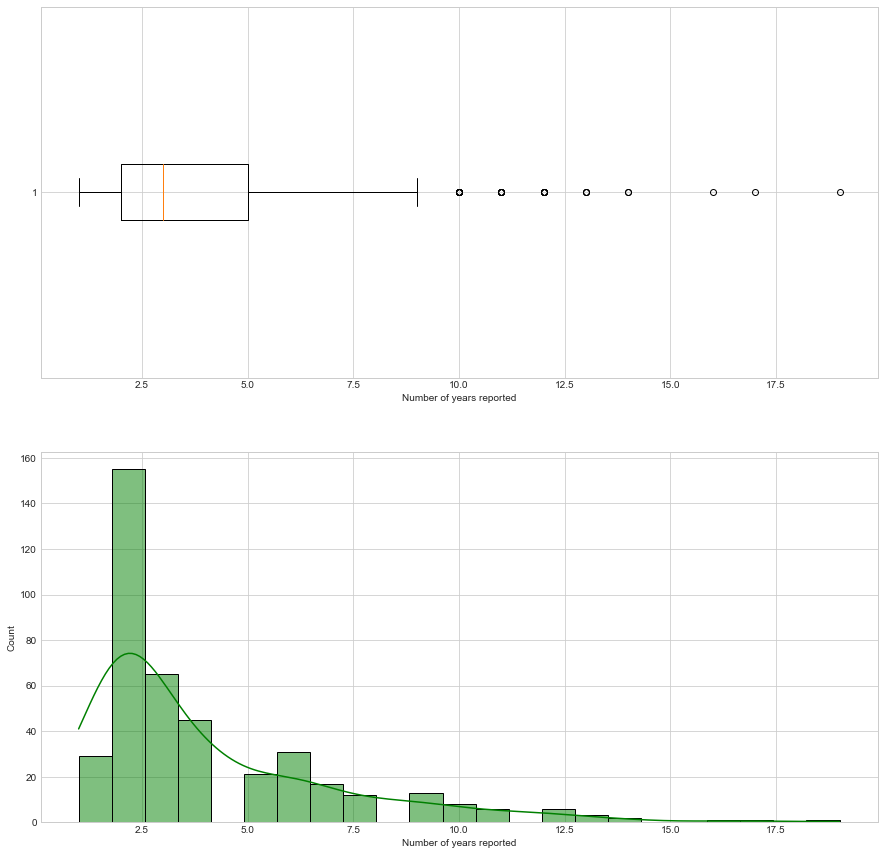

In [8]:
print(f"{downloaded.columns}")
#Check the records we found
#Number of years the company submitted something
def Number_years(df):
    ID_year_pairs = df[["ID","Year"]]
    #print(f"{ID_year_pairs}")
    ID_year_pairs = ID_year_pairs.drop_duplicates()
    years_reported = ID_year_pairs.groupby("ID")["ID"].count()
    print(f"Summary statistics for number of years reported for each ID \n {years_reported.describe()}")
    fig, ax = plt.subplots(2,figsize=(15, 15))
    descript = ax[0].boxplot(years_reported,notch=False,vert=False)
    ax[0].set(xlabel="Number of years reported")
    sns.histplot(ax = ax[1],x=years_reported,color=['green'],kde=True)
    ax[1].set(xlabel="Number of years reported",ylabel="Count")
    return fig,ax
Number_years(downloaded)
#sns.kdeplot(ax = ax[1],x=years_reported,color='blue',hist=True)

Index(['ID', 'Name', 'Report', 'Date', 'Year', 'Version', 'Link'], dtype='object')
Number of ID_year_submissions_pairs: 3682
Summary statistics for number of years reported for each ID 
 count    1674.000000
mean        2.199522
std         1.874318
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        24.000000
Name: ID, dtype: float64


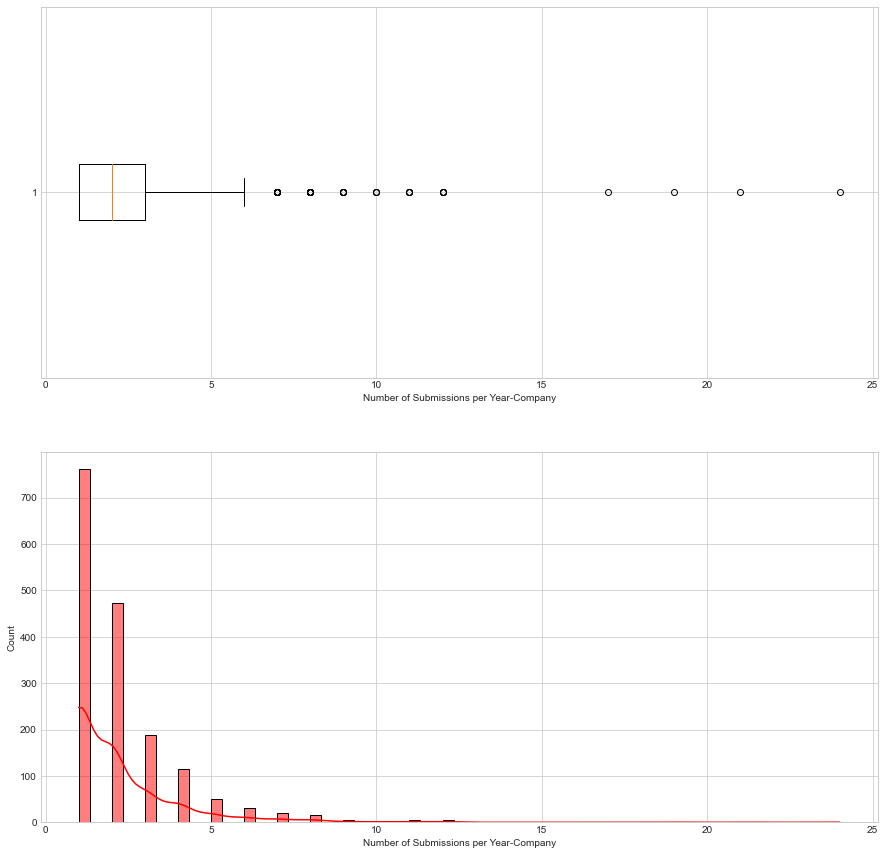

In [13]:
print(downloaded.columns)
#Number of Submissions 
#Number of Submissions per year per company
def sub_year_company(df):
    ID_year_submissions = df[["ID","Year","Version"]].drop_duplicates()
    print(f"Number of ID_year_submissions_pairs: {len(ID_year_submissions)}")
    Number_submissions_per_year = ID_year_submissions.groupby(["ID","Year"])["ID"].count()
    print(f"Summary statistics for number of years reported for each ID \n {Number_submissions_per_year.describe()}")
    fig, ax = plt.subplots(2,figsize=(15, 15))
    #fig[0].title
    descript = ax[0].boxplot(Number_submissions_per_year,notch=False,vert=False)
    sns.histplot(ax = ax[1],x=Number_submissions_per_year,color='red',kde=True)
    ax[0].set(xlabel="Number of Submissions per Year-Company")
    ax[1].set(xlabel="Number of Submissions per Year-Company",ylabel="Count")
sub_year_company(downloaded)
    
#Last submission before 2021
#How many are being submitted continuously?
#Outlier characterics?

       ID  Year
0    IVDN  2017
1    HERB  2021
2    APLD  2021
3    GEGP  2021
4    EEGI  2010
..    ...   ...
411  PCLI  2021
412  MRDH  2021
413  QOIL  2010
414  WWDH  2021
415  GAMN  2007

[416 rows x 2 columns]


[Text(0.5, 0, 'First Year of reporting')]

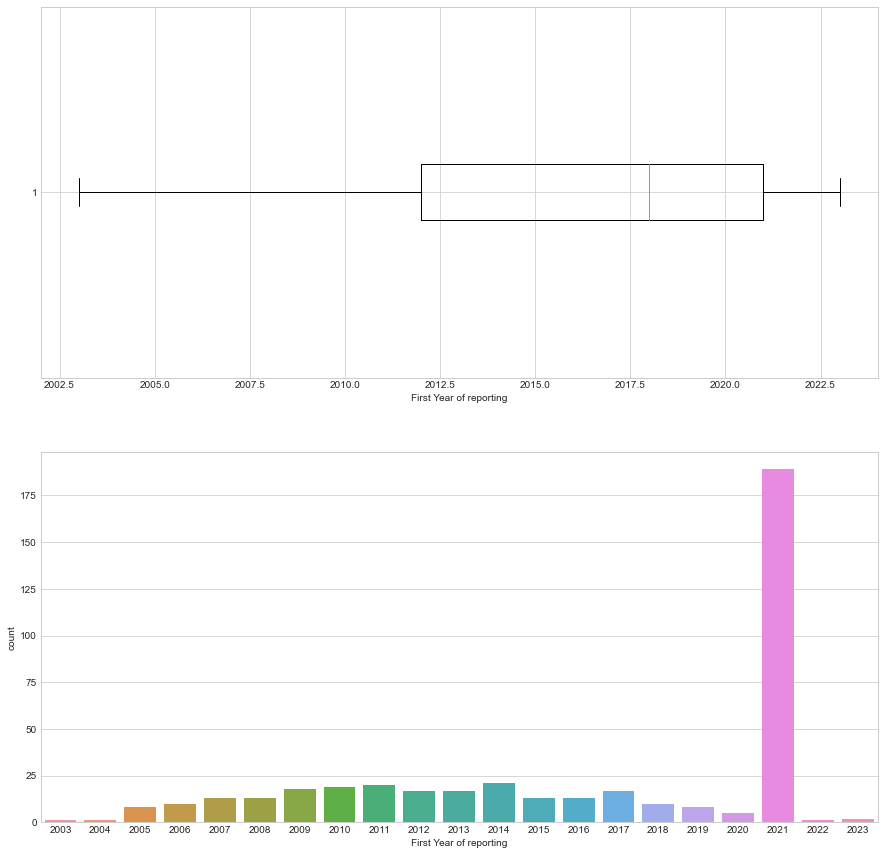

In [28]:
before_2021 = []
after_2021  = []
First_year  = {}
First_year_Frame  = pd.DataFrame(columns=['ID','Year']) 


for ID in downloaded['ID'].unique():
    year = min(downloaded[downloaded['ID'] == ID]['Year'])
    First_year[ID] = year
    First_year_Frame.loc[First_year_Frame.shape[0]] = [ID,year]
    if First_year[ID] < 2021:
        before_2021.append(ID)
    else:
        after_2021.append(ID)
#First_year_frame = pd.DataFrame.from_dict(First_year)#, columns = ['ID','Year'])
print(First_year_Frame)
fig, ax = plt.subplots(2,figsize=(15, 15))
ax[0].boxplot(First_year.values(),notch=False,vert=False)
ax[0].set(xlabel="First Year of reporting")
#sns.histplot(ax=ax[1],x=First_year.values(),element = 'bars',color='red',kde=True)
sns.countplot(ax=ax[1],x="Year",data=First_year_Frame)
ax[1].set(xlabel="First Year of reporting")


In [166]:
Before_2021 = downloaded[downloaded['ID'].isin(before_2021)] 
After_2021 = downloaded[downloaded['ID'].isin(after_2021)] 
print(f"{len(before_2021)} companies made first {Before_2021.shape[0]} submissions before 2021 \n{len(after_2021)} companies made first {After_2021.shape[0]} submission  after 2021")
#Check if the two groups publish more or less same titles for their submissions
print(len(Before_2021['Report'].unique()),len(After_2021['Report'].unique()))

#Seems like they are different wildly, Should I figure out how to broadly group them into wide categories?

224 companies made first 2745 submissions before 2021 
192 companies made first 941 submission  after 2021
1778 573


In [3]:
strs = ["flower","flow","flight"]
Found = False
i = len(strs[0])
while Found == False:
    #select the prefix substring
    Substring = strs[0][0:i]
    print(Substring,Found)
    #for that substring,
    for string in strs[1:]:
        if Substring in string:
                # print("Jere")
            if string == strs[-1]:
                Found = True
                continue
        else:
                   
            i -=1
            break
print(Substring)

flower False
flowe False
flow False
flo False
fl False
fl
